# Problem2
## 1.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as LA
class lasso:
    def __init__(self,A,mu,l):
        self.A=A
        self.mu=mu
        self.l=l
    
    def objective(self,w):
        return np.dot(np.dot((w-self.mu),A),(w-self.mu).T)+self.l*np.sum(np.abs(w))
    def grad(self,w):
        
        return 2*np.dot(A,np.array(w-self.mu).T)
        """
        h=1/(2**12)
        gradient=np.zeros_like(w)
        for i in range(np.array(w).size):
            tmp=w[i]
            #print(w[i])
            w[i]=w[i]+h
            f1=self.objective(w)
            w[i]=tmp-h
            f2=self.objective(w)
            gradient[i]=(f1-f2)/(2*h)
            w[i]=tmp
        return gradient
        """

In [2]:
A=np.array([[3,0.5],[0.5,1]])
mu=np.array([1,2])

L=2*np.max(LA.eig(A)[0])
L=(1/L)
print(L)

0.1603574565909282


4.9091000000000005
[ 3 -1]
23.0


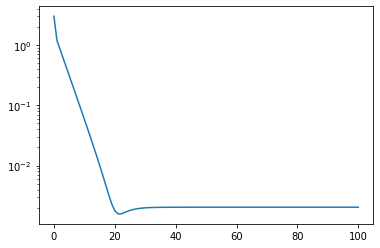

In [3]:
class prox:
    def __init__(self,m,l,L):
        #self.lasso=lasso
        self.m=m
        self.l=l
        self.L=L
    def f(self,w):
        return np.dot(w-m,(w-self.m).T)/2 + self.l*np.sum(np.abs(w))
    def opt(self,w):
        ans=np.zeros_like(self.m)
        for i in  range(self.m.size):
            if self.m[i]>self.l*self.L:
                ans[i]=self.m[i]-self.l*self.L
            elif np.abs(self.m[i])<=self.l*self.L:
                ans[i]=0
            else:
                ans[i]=self.m[i]+self.l*self.L
        return ans
w=np.array([3,-1])
lass=lasso(A,mu,2)
best=np.array([0.82,1.09])
print(lass.objective([0.82,1.09]))
print(w)
print(lass.objective(w))
#print(lass.grad(w))

w_s=np.zeros([2,101])
w_s[0][0]=3
w_s[1][0]=-1
dis=np.zeros(101)
#print(np.sqrt(np.sum(((w-best))**2)))
dis[0]=np.sqrt(np.sum(((w-best))**2))
for i in range(100):
    pr=prox(w-L*lass.grad(w),2,L)
    w=pr.opt(w-L*lass.grad(w))
    w_s[0][i+1]=w[0]
    w_s[1][i+1]=w[1]
    #print("w="+str(w))
    dis[i+1]=np.sqrt(np.sum(((w-best))**2))
import matplotlib.pyplot as plt
#print(w_s[0:100][0])
#print(w_s[1][:])
plt.plot(dis)
plt.yscale('log')
plt.show()

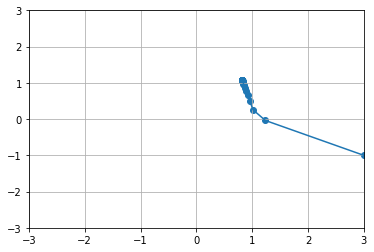

In [4]:
plt.plot(w_s[0],w_s[1])
plt.scatter(w_s[0],w_s[1])
plt.ylim([-3,3])
plt.xlim([-3,3])
plt.grid()
plt.show()

7.6364
[ 3 -1]
31.0


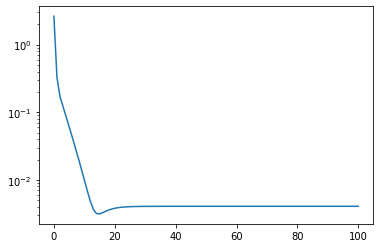

In [5]:
lass=lasso(A,mu,4)
w=np.array([3,-1])
print(lass.objective([0.64,0.18]))
print(w)
best=np.array([0.64,0.18])

print(lass.objective(w))
w_s=np.zeros([2,101])
w_s[0][0]=3
w_s[1][0]=-1
dis=np.zeros(101)
#print(np.sqrt(np.sum(((w-best))**2)))
dis[0]=np.sqrt(np.sum(((w-best))**2))
for i in range(100):
    pr=prox(w-L*lass.grad(w),4,L)
    w=pr.opt(w)
    #print(lass.objective(w))
    #print(w-L*lass.grad(w))
    #print("w="+str(w))
    w_s[0][i+1]=w[0]
    w_s[1][i+1]=w[1]
    dis[i+1]=np.sqrt(np.sum(((w-best))**2))
plt.yscale('log')
plt.plot(dis)
plt.show()

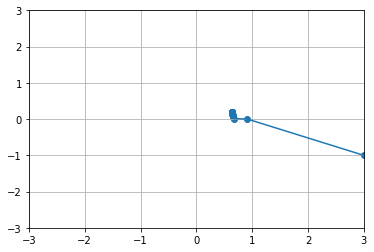

In [6]:
plt.plot(w_s[0],w_s[1])
plt.scatter(w_s[0],w_s[1])
plt.ylim([-3,3])
plt.xlim([-3,3])
plt.grid()
plt.show()

8.6667
[ 3 -1]
39.0


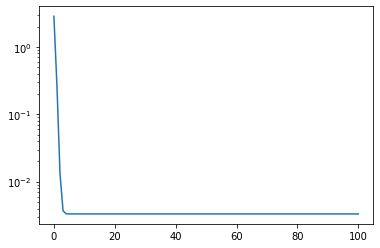

In [7]:
lass=lasso(A,mu,6)
w=np.array([3,-1])
print(lass.objective([0.33,0]))
print(w)
best=np.array([0.33,0])

print(lass.objective(w))
w_s=np.zeros([2,101])
w_s[0][0]=3
w_s[1][0]=-1
dis=np.zeros(101)
#print(np.sqrt(np.sum(((w-best))**2)))
dis[0]=np.sqrt(np.sum(((w-best))**2))
for i in range(100):
    pr=prox(w-L*lass.grad(w),6,L)
    w=pr.opt(w)
    #print(lass.objective(w))
    #print(w-L*lass.grad(w))
    #print("w="+str(w))
    w_s[0][i+1]=w[0]
    w_s[1][i+1]=w[1]
    dis[i+1]=np.sqrt(np.sum(((w-best))**2))
plt.yscale('log')
plt.plot(dis)
plt.show()

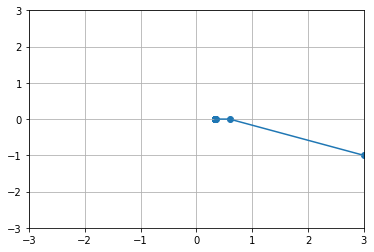

In [8]:
plt.plot(w_s[0],w_s[1])
plt.scatter(w_s[0],w_s[1])
plt.ylim([-3,3])
plt.xlim([-3,3])
plt.grid()
plt.show()

### 2